# **NHẬP THƯ VIỆN VÀ DỮ LIỆU**

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
try:
    import plotly.express as px
    import plotly.graph_objects as go

except:
    !pip install plotly
    import plotly.express as px
    import plotly.graph_objects as go
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

import scipy.cluster.hierarchy as sch
from sklearn. preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

try:
    from kneed import KneeLocator
except:
    !pip install kneed
    from kneed import KneeLocator
#------------------------------------------------------------------
try:
    from yellowbrick.cluster import KElbowVisualizer
except:
    !pip install -U yellowbrick
    from yellowbrick.cluster import KElbowVisualizer

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bank_transactions.csv')
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Chúng tôi thấy rằng: có 1.048.567 giao dịch (hàng) nhưng một số cột có số lượng thấp hơn. Điều này chỉ ra rằng có các giá trị null (trống) trong các cột đó.***

# **THỐNG KÊ DỮ LIỆU**


In [ ]:
print('Có tất cả ', len(data), ' giao dịch/hàng và ', data.shape[1], ' cột trong tập dữ liệu của chúng tôi.')

data.count()

Có tất cả  1048567  giao dịch/hàng và  9  cột trong tập dữ liệu của chúng tôi.


TransactionID              1048567
CustomerID                 1048567
CustomerDOB                1045170
CustGender                 1047467
CustLocation               1048416
CustAccountBalance         1046198
TransactionDate            1048567
TransactionTime            1048567
TransactionAmount (INR)    1048567
dtype: int64

In [ ]:
data.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,TransactionDate1,TransactionDate2
count,1041613,1.041613e+06,1041613,1.041613e+06,1.041613e+06,1041613,1041613
mean,1984-06-14 08:52:34.661088128,1.149987e+05,2016-07-25 19:22:59.322647040,1.566066e+03,2.875154e+01,2016-07-25 19:22:59.322647040,2016-07-25 19:22:59.322647040
min,1800-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,1.200000e+01,2016-01-08 00:00:00,2016-01-08 00:00:00
25%,1983-08-15 00:00:00,4.728140e+03,2016-06-09 00:00:00,1.600000e+02,2.500000e+01,2016-06-09 00:00:00,2016-06-09 00:00:00
50%,1988-10-08 00:00:00,1.676852e+04,2016-08-20 00:00:00,4.575000e+02,2.800000e+01,2016-08-20 00:00:00,2016-08-20 00:00:00
75%,1992-06-26 00:00:00,5.742885e+04,2016-09-09 00:00:00,1.200000e+03,3.100000e+01,2016-09-09 00:00:00,2016-09-09 00:00:00
max,2073-12-31 00:00:00,1.150355e+08,2016-12-09 00:00:00,1.560035e+06,4.200000e+01,2016-12-09 00:00:00,2016-12-09 00:00:00
std,NaN,8.467613e+05,NaN,6.561398e+03,4.938050e+00,NaN,NaN


# ***1. LÀM SẠCH DỮ LIỆU***


In [ ]:
# Đếm xem những cột dữ liệu trong bảng bị thiếu bao nhiêu dữ liệu
data.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
# Đếm xem có bao nhiêu cột dữ liệu bị trùng nhau
data.duplicated().sum()

0

***Ta có thể thấy Ở DataFrame của khách hàng có rất nhiều giá trị bị thiếu. Tuy nhiên lại không có giá trị trùng nhau. Vì vậy ta cần xử lý những dữ liệu bị thiếu.***

In [ ]:
# Xóa những dữ liệu bị thiếu
data = data.dropna()

data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
# Xóa những cột không cần thiết
#Cụ thể ở đây là xóa cột TransactionTime
data.drop('TransactionTime', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), object(6)
memory usage: 71.5+ MB


<ipython-input-13-20f4cdab5ee0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('TransactionTime', axis = 1, inplace = True)


***Tiếp theo, chúng tôi kiểm tra các biến ngoại lệ của số dư tài khoản và số tiền giao dịch***

In [ ]:
data[['CustAccountBalance', 'TransactionAmount (INR)']].describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1041614.0,114998.605283,846760.940316,0.0,4728.14,16768.52,57428.85,1.150355e+08
TransactionAmount (INR),1041614.0,1566.096079,6561.464373,0.0,160.00,457.50,1200.00,1.560035e+06


***Sử dụng hàm mô tả, chúng ta thấy một số thống kê mô tả cho các biến .
Đáng chú ý là phần lớn  CustAccountBalance và TransactionAmount (INR) được so sánh nằm ở khoảng phân vị 75%***

In [ ]:
# Kiểm tra khách hàng có số dư tài khoản lớn nhất
data[data['CustAccountBalance'] == data ['CustAccountBalance'].max()]


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
40982,T40983,C2916865,3/8/67,M,SHILLONG,115035495.1,27/9/16,6959.00
656264,T656265,C3316830,3/8/67,M,SHILLONG,115035495.1,28/8/16,28019.32
789085,T789086,C6416825,3/8/67,M,SHILLONG,115035495.1,5/9/16,5864.00
826721,T826722,C2216823,3/8/67,M,SHILLONG,115035495.1,4/9/16,4699.00
835641,T835642,C2916887,3/8/67,M,SHILLONG,115035495.1,4/9/16,600.00
876392,T876393,C8116818,3/8/67,M,SHILLONG,115035495.1,8/9/16,3149.00
879623,T879624,C4316889,3/8/67,M,SHILLONG,115035495.1,8/9/16,4364.00
1001213,T1001214,C5916881,3/8/67,M,SHILLONG,115035495.1,14/9/16,1599.00
1002072,T1002073,C5116828,3/8/67,M,SHILLONG,115035495.1,14/9/16,5060.00
1002847,T1002848,C7716886,3/8/67,M,SHILLONG,115035495.1,14/9/16,3604.00


In [ ]:
# Kiểm tra giao dịch có số tiền giao dịch lớn nhất
data[data['TransactionAmount (INR)'] == data['TransactionAmount (INR)'].max()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
399117,T399118,C7319271,25/5/76,M,GURGAON,42487.89,18/8/16,1560034.99


In [ ]:
# Chuyển kiểu dữ liệu của hai cột: TransactionDate and CustomerDOB
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'])

<ipython-input-17-3575f8f8a0cb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
<ipython-input-17-3575f8f8a0cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
<ipython-input-17-3575f8f8a0cb>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'])
<ipython-input-17-3575f8f8a0cb>:3: SettingW

In [ ]:
print(data.dtypes)

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionAmount (INR)           float64
dtype: object


In [ ]:
# Kiểm tra sụ phân phối của các trường dữ liệu phân loại.
data[['CustomerID', 'CustGender', 'CustLocation']].describe()

,CustomerID,CustGender,CustLocation
count,1041614,1041614,1041614
unique,879358,3,9275
top,C5533885,M,MUMBAI
freq,6,760978,101997


In [ ]:
# Kiểm tra sụ phân phối của các trường dữ liệu số học
data[['CustAccountBalance', 'TransactionAmount (INR)']].describe()

,CustAccountBalance,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.566096e+03
std,8.467609e+05,6.561464e+03
min,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.600000e+02
50%,1.676852e+04,4.575000e+02
75%,5.742885e+04,1.200000e+03
max,1.150355e+08,1.560035e+06


In [ ]:
# Tính toán độ tuổi của khách hàng kể từ lần cuối giao dịch
data['CustomerAge'] = data['TransactionDate'].dt.year-data['CustomerDOB'].dt.year
data['CustomerAge'].describe()

<ipython-input-21-bd048bf32160>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerAge'] = data['TransactionDate'].dt.year-data['CustomerDOB'].dt.year


count    1.041614e+06
mean     3.201278e+01
std      4.952469e+01
min     -5.700000e+01
25%      2.400000e+01
50%      2.800000e+01
75%      3.300000e+01
max      2.160000e+02
Name: CustomerAge, dtype: float64

***Nhận thấy có một điều khác thường, bất hợp lý ở cột tuổi: nhỏ nhất là (-57) và lớn nhất là (216).
Do vậy, chúng tôi thay thế những người có độ tuổi nhỏ hơn 12 và lớn hơn 100 bằng giá trị trung bình***

In [ ]:
data.loc[(data['CustomerAge'] < 12) | (data['CustomerAge'] >= 100),'CustomerAge'] = data['CustomerAge'].median()

In [ ]:
# Check the contents of CustGender column.
data['CustGender'].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [ ]:
data.drop(data[data['CustGender']=='T'].index,inplace=True)

<ipython-input-24-7381bf6bf2e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['CustGender']=='T'].index,inplace=True)


 ***Chúng ta có thể thấy rằng cột CustGender có một cột có giá trị T. Chúng ta có thể loại bỏ điều này bằng cách sử dụng hàm .replace().
Chuyển đổi các giá trị của CustGender từ 'M' và 'T' thành 'Male', 'F' thành 'Female'***

In [ ]:
data['CustGender'] = data['CustGender'].replace({'M':'Male', 'F':'Female'})
data.sample(10)

<ipython-input-25-c171b4ae7c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustGender'] = data['CustGender'].replace({'M':'Male', 'F':'Female'})


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
646722,T646723,C3536020,1987-10-17,Female,NOIDA,124794.93,2016-08-25,945.00,29
789478,T789479,C2189876,1997-05-10,Female,ROURKELA,10630.84,2016-05-09,145.00,19
4355,T4356,C8739268,1800-01-01,Male,HOSPITAL BEHIND COIMBATORE,92597.62,2016-09-22,631.26,28
78985,T78986,C5320143,1986-02-16,Male,SURAT,627.36,2016-02-08,20.00,30
249561,T249562,C1931789,1996-09-04,Male,NORTH 24 PARGANAS,16217.94,2016-07-08,210.00,20
111856,T111857,C8512949,2073-01-07,Male,INDORE,249782.07,2016-06-08,1286.79,28
6981,T6982,C3242772,1994-11-16,Female,COMMUNITY HALL HYDERABAD,2658.19,2016-09-25,2.00,22
83509,T83510,C2416478,1982-01-10,Male,GHAZIABAD,9385.56,2016-01-08,101.00,34
511174,T511175,C3241571,1993-10-09,Male,MUMBAI,21923.21,2016-08-19,20.00,23
88787,T88788,C7511248,1978-04-26,Male,BANGALORE,93332.98,2016-01-08,38.00,38


## ***KIỂM TRA OUTLIER***

In [ ]:
num_col = data.select_dtypes(include=np.number)
cat_col = data.select_dtypes(exclude=np.number)

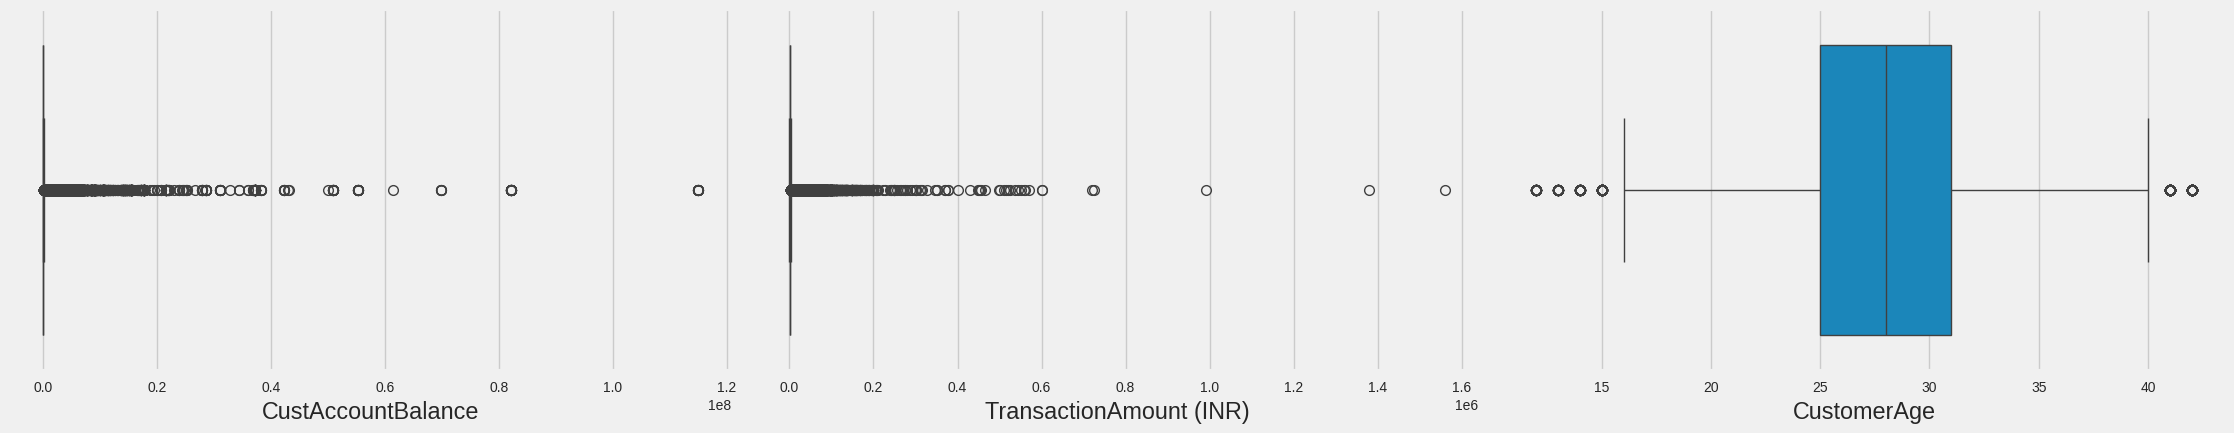

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_col,x=column)

plt.tight_layout(pad = 1.0)

In [ ]:
#df['TransactionDate1'] ==> I will keep it to do visaulization
data['TransactionDate1']=data['TransactionDate'] # ==> to calculate the minimum (first transaction)
data['TransactionDate2']=data['TransactionDate'] # ==> to calculate the maximum (last transaction)

<ipython-input-28-9da48e3c9267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TransactionDate1']=data['TransactionDate'] # ==> to calculate the minimum (first transaction)
<ipython-input-28-9da48e3c9267>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TransactionDate2']=data['TransactionDate'] # ==> to calculate the maximum (last transaction)


In [ ]:
#Creating MRF Table Strategy

MRF_data = data.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionAmount (INR)" : "mean",
                                        "CustomerAge" : "median",
                                        "TransactionDate2":"max",
                                        "TransactionDate1":"min",
                                        "TransactionDate":"median"
                        })

MRF_data = MRF_data.reset_index()
MRF_data.head()

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,Female,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,Male,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,Female,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,Female,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15
4,C1010024,1,Male,KOLKATA,87058.650,5000.0,28.0,2016-08-18,2016-08-18,2016-08-18


In [ ]:
MRF_data.shape

(879357, 10)

In [ ]:
MRF_data.drop(columns=["CustomerID"],inplace=True)

In [ ]:
MRF_data.rename(columns={"TransactionID":"Frequency"},inplace=True)

In [ ]:
MRF_data.drop(columns=['CustLocation','TransactionDate'],inplace=True)

In [ ]:
MRF_data=MRF_data.reset_index(drop=True)
MRF_data.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1
0,2,Female,76340.635,2553.0,28.5,2016-09-26,2016-09-08
1,1,Male,24204.490,1499.0,22.0,2016-08-14,2016-08-14
2,2,Female,100112.950,727.5,28.0,2016-07-08,2016-01-08
3,1,Female,496.180,30.0,26.0,2016-09-15,2016-09-15
4,1,Male,87058.650,5000.0,28.0,2016-08-18,2016-08-18


In [ ]:
MRF_data['CustGender']=MRF_data['CustGender'].map({'Male':1,'Female':0})
MRF_data

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1
0,2,0,76340.635,2553.0,28.5,2016-09-26,2016-09-08
1,1,1,24204.490,1499.0,22.0,2016-08-14,2016-08-14
2,2,0,100112.950,727.5,28.0,2016-07-08,2016-01-08
3,1,0,496.180,30.0,26.0,2016-09-15,2016-09-15
4,1,1,87058.650,5000.0,28.0,2016-08-18,2016-08-18
...,...,...,...,...,...,...,...
879352,1,1,133067.230,691.0,26.0,2016-07-08,2016-07-08
879353,1,1,96063.460,222.0,20.0,2016-09-15,2016-09-15
879354,1,1,5559.750,126.0,23.0,2016-08-18,2016-08-18
879355,1,1,35295.920,50.0,21.0,2016-08-28,2016-08-28


In [ ]:
MRF_data.drop(columns=["TransactionDate1"],inplace=True)

In [ ]:
MRF_data.drop(columns=["TransactionDate2"],inplace=True)

## ***Data Scaling***


In [ ]:
# data scaling
df_scaled=StandardScaler().fit_transform(MRF_data)
df_scaled=pd.DataFrame(df_scaled,columns=MRF_data.columns)
df_scaled.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,1.816407,-1.645853,-0.047903,0.153306,-0.051584
1,-0.410992,0.607588,-0.112985,-0.010533,-1.425541
2,1.816407,-1.645853,-0.018228,-0.130458,-0.157273
3,-0.410992,-1.645853,-0.142580,-0.238881,-0.580029
4,-0.410992,0.607588,-0.034524,0.533679,-0.157273


In [ ]:
df_scaled=df_scaled.sample(n=100000,random_state=42).reset_index(drop=True)
df_scaled.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,-0.410992,0.607588,-0.142340,-0.216341,0.265483
1,-0.410992,0.607588,0.610186,-0.093540,0.899616
2,1.816407,0.607588,0.575669,-0.016524,0.793927
3,-0.410992,0.607588,-0.076593,-0.110328,-0.368651
4,-0.410992,0.607588,-0.093878,-0.165977,-0.580029


# **2. PHÂN TÍCH THĂM DÒ**

 **Chúng ta có thể mở rộng phân tích thăm dò trước đây bằng cách xem xét những điều sau:**

**1. Phân bổ giao dịch trên mỗi khách hàng (Tần suất)**

**2. Phân phối doanh thu trên mỗi khách hàng (Tiền tệ)**

**3. Tổng doanh thu hàng tháng**

**Vì hiện chúng tôi quan tâm đến khía cạnh tiền tệ của dữ liệu nên chúng tôi sẽ thêm các số liệu liên quan vào phân tích của mình.**

In [ ]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,TransactionDate1,TransactionDate2
0,T1,C5841053,1994-10-01,Female,JAMSHEDPUR,17819.05,2016-02-08,25.0,22,2016-02-08,2016-02-08
1,T2,C2142763,2057-04-04,Male,JHAJJAR,2270.69,2016-02-08,27999.0,28,2016-02-08,2016-02-08
2,T3,C4417068,1996-11-26,Female,MUMBAI,17874.44,2016-02-08,459.0,20,2016-02-08,2016-02-08
3,T4,C5342380,2073-09-14,Female,MUMBAI,866503.21,2016-02-08,2060.0,28,2016-02-08,2016-02-08
4,T5,C9031234,1988-03-24,Female,NAVI MUMBAI,6714.43,2016-02-08,1762.5,28,2016-02-08,2016-02-08


In [ ]:
# Xác định tổng số lượng khách hàng
data['CustomerID'].nunique()

879357

***Có tất cả 879,358 khách hàng duy nhất.***

##***2.1 GIỚI TÍNH***

In [ ]:
#Nhóm các giao dịch theo giới tính của khách hàng
data_customers = data.groupby('CustGender')['TransactionID'].nunique()

data_customers

CustGender
Female    280635
Male      760978
Name: TransactionID, dtype: int64

<ipython-input-43-8d18a84844e2>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axs[1] = sns.distplot(data[(data['CustGender'] == 'Male') & (data['TransactionAmount (INR)'] < np.percentile(data['TransactionAmount (INR)'], 90))]['TransactionAmount (INR)'],
<ipython-input-43-8d18a84844e2>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

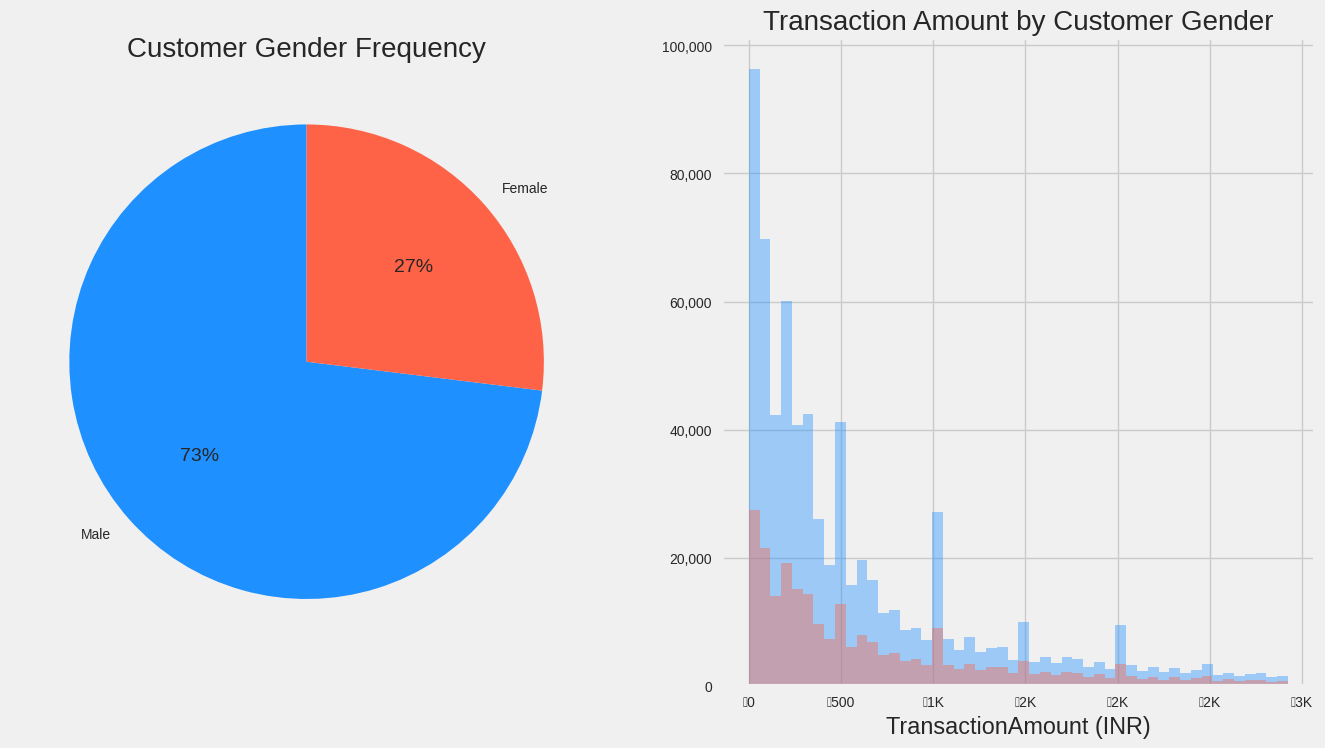

In [ ]:

def currency(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e6:
        s = '₹{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        s = '₹{:1.0f}K'.format(x*1e-3)
    else:
        s = '₹{:1.0f}'.format(x)
    return s
fig, axs = plt.subplots(ncols = 2,nrows = 1, figsize = (15, 8))
#Tạo một hình vẽ (fig) với hai trục (axs) bằng cách sử dụng plt.subplots(ncols=2, nrows=1, figsize=(15, 8)).
#Hai trục này sẽ được sử dụng để vẽ biểu đồ tròn và biểu đồ histogram.

#BIỂU ĐỒ TRÒN: Customer Gender Frequency- Tỷ lệ giao dịch của khách hàng theo giới tính
axs[0].pie(data['CustGender'].value_counts(), autopct= '%1.f%%', labels = ['Male', 'Female'], startangle = 90, colors = ['dodgerblue', 'tomato'])
axs[0].set_title("Customer Gender Frequency", size = 20)

#BIỂU ĐỒ CỘT: Transaction Amount by Customer Gender - Số tiền giao dịch của khách hàng theo giới tính
axs[1] = sns.distplot(data[(data['CustGender'] == 'Male') & (data['TransactionAmount (INR)'] < np.percentile(data['TransactionAmount (INR)'], 90))]['TransactionAmount (INR)'],
                     label = True, kde = False, color = 'dodgerblue')
axs[1] = sns.distplot(data[(data['CustGender'] == 'Female') & (data['TransactionAmount (INR)'] < np.percentile(data['TransactionAmount (INR)'],90))]['TransactionAmount (INR)'],
                     label = 'Female', kde = False, color = 'tomato')
axs[1].set_title("Transaction Amount by Customer Gender", size = 20)

import matplotlib.ticker as ticker
axs[1].xaxis.set_major_formatter(currency)
axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


**Hàm currency(x, pos):** Hàm này nhận vào giá trị và vị trí của đồ thị và trả về một chuỗi định dạng đúng với ký hiệu tiền tệ.

Nếu giá trị x lớn hơn hoặc bằng 1 triệu (1e6), chuỗi trả về sẽ có định dạng ₹<giá trị>/1.1fM (ví dụ: ₹1.2M).

Nếu x lớn hơn hoặc bằng 1 nghìn (1e3), chuỗi trả về sẽ có định dạng ₹<giá trị>/1.0fK (ví dụ: ₹1.5K).

Trong trường hợp còn lại, chuỗi trả về sẽ có định dạng ₹<giá trị>/1.0f (ví dụ: ₹500)

***₹: RUPPY- đơn vị tiền tệ của Ấn Độ***

##***2.2  TẦN SUẤT***

***Lựa chọn 10 thành phố có số lượng giao dịch nhiều nhất.***

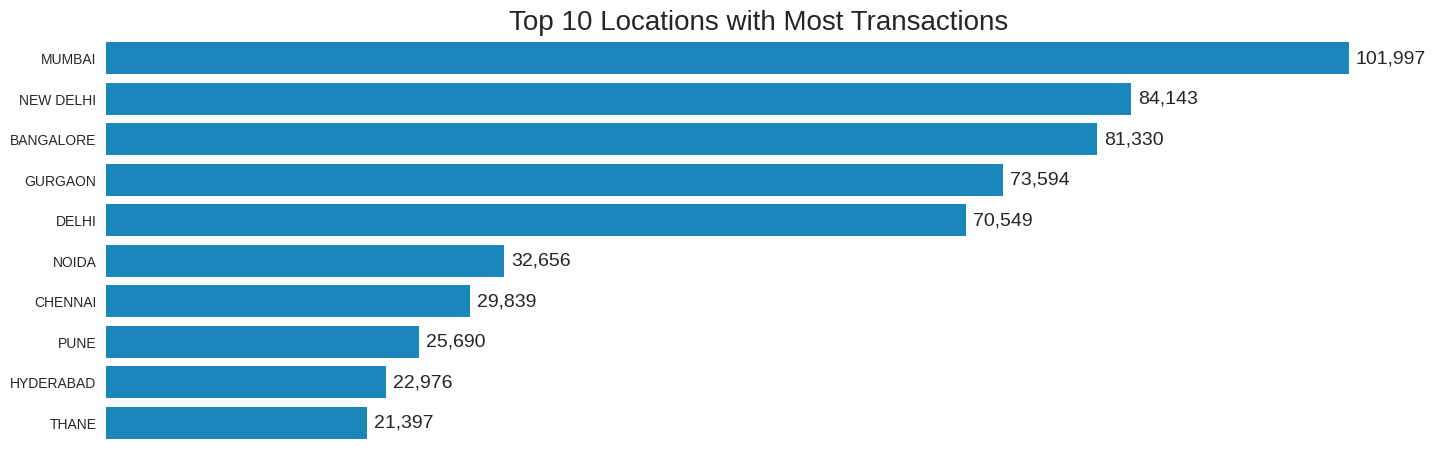

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(y='CustLocation', data=data,
              order=data['CustLocation'].value_counts()[:10].index, ax=ax)

ax.set_title("Top 10 Locations with Most Transactions", fontsize='20')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.xaxis.grid(False)

# Xóa các đường viền
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Thêm nhãn tên cho dữ liệu
for p in ax.patches:
    ax.annotate(format(int(p.get_width()), ','),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


 Có thể thấy từ biểu đồ phía trên: Mumbai, New Delhi, Bangalore, Gurgaon và Delhi là 5 thành phố hàng đầu với số lượng giao dịch nhiều nhất. Điều này có thể là do ba trong số các thành phố này có dân số đông đúc hơn, điều kiện kinh tế tốt hơn, và phạm vi lương cao hơn.

##***2.3 Tuổi***

<ipython-input-45-e439a05a2c3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeBin'] = pd.cut(x = data['CustomerAge'], bins = bins, labels = labels, right = True)


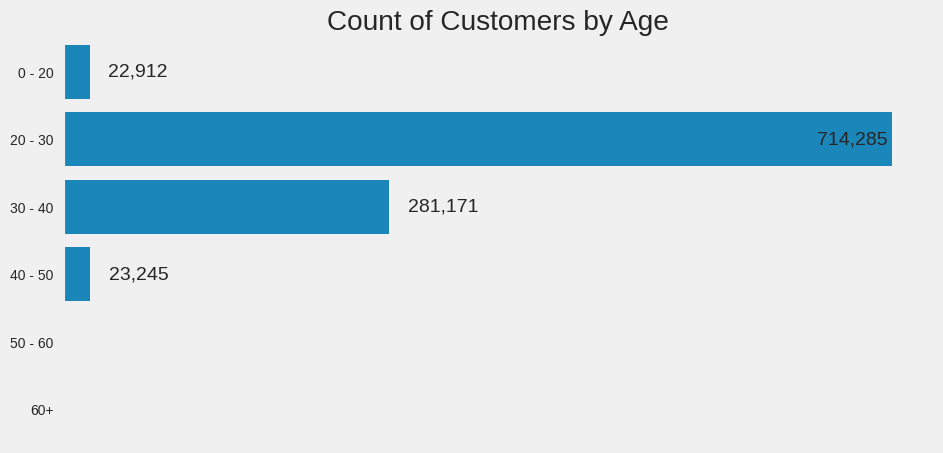

In [ ]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60+']
data['AgeBin'] = pd.cut(x = data['CustomerAge'], bins = bins, labels = labels, right = True)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(data, y = 'AgeBin', order = labels)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Count of Customers by Age')
ax.set_xticklabels([])
ax.xaxis.grid(False)

for p in ax.patches:
    width = p.get_width()
    label = format(int(width), ',')
    x = width + 10000 if width < 700000 else width - 10000
    ax.annotate(label,
                xy=(x, p.get_y() + p.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left' if width < 700000 else 'right',
                va='center')

plt.show()

Ở biểu đồ trên cho thấy, phần lớn khách hàng của ngân hàng có độ tuổi từ 20 - 40. Điều này chứng minh rằng họ đều là những người đi làm, là người tạo ra dòng tiền chính của ngân hàng.

# **3. PHÂN KHÚC KHÁCH HÀNG**



##**3.1 PHÂN KHÚC RFM**

Mô hình RFM thường được sử dụng trong tiếp thị để phân khúc khách hàng dựa trên hành vi mua sắm của họ, sau đó xử lý từng phân khúc bằng các chiến lược nhắm mục tiêu. Ba số liệu được sử dụng trong phân khúc là:

Lần gần nhất(R- Recency): Bao nhiêu ngày kể từ ngày giao dịch cuối cùng của khách hàng? Giá trị càng thấp thì khách hàng càng trung thành với công ty.

Tần suất(F-Frequency): Khách hàng thực hiện giao dịch bao nhiêu lần trong kỳ? Giá trị càng cao, khách hàng càng tích cực hơn đối với các sản phẩm và dịch vụ của chúng tôi.

Tiền tệ (M-Monetary): Tổng số tiền giao dịch hoặc số tiền khách hàng chi tiêu trong kỳ. Đây là số liệu quan trọng nhất trong mô hình. Giá trị càng cao thì giá trị tiền tệ mà khách hàng có thể mang lại cho công ty càng lớn.

Các bước của RFM:

**Bước 1**: Tính giá trị thô của từng số liệu.

**Bước 2:** Gán dấu cho từng giá trị thô dựa trên phân phối của chúng.

**Bước 3:** Dựa vào điểm trung bình của từng chỉ số, quyết định hạng của từng hồ sơ khách hàng (0 hoặc 1, 1 nghĩa là đủ tiêu chuẩn, 0 nghĩa là không đủ tiêu chuẩn).

**Bước 4:** Phân khúc khách hàng dựa trên hạng được chỉ định (0 hoặc 1).

LƯU Ý: Nhóm kinh doanh phải quyết định phạm vi thời gian được chọn dựa trên cài đặt thực tế, ở đây chỉ sử dụng toàn bộ khung thời gian trong dữ liệu. Ở đây chúng tôi không xem xét số dư vì giao dịch thực sẽ tạo ra nhiều giá trị hơn cho doanh nghiệp.

***Bước 1: Tính toán***
***Sử dụng ngày giao dịch cuối cùng trong dữ liệu làm cơ sở, sau đó tính toán chênh lệch giữa ngày giao dịch cuối cùng của mỗi khách hàng với ngày giao dịch cuối cùng của dữ liệu.***

In [ ]:
data_RFM = data.copy()
data_RFM = data_RFM.groupby(['CustomerID']).agg(Last_Trans_Date = ('TransactionDate', 'max'),
                                                M = ('TransactionAmount (INR)', 'sum'),
                                                F = ('TransactionID', 'count')).reset_index()

data_RFM.head()

,CustomerID,Last_Trans_Date,M,F
0,C1010011,2016-09-26,5106.0,2
1,C1010012,2016-08-14,1499.0,1
2,C1010014,2016-07-08,1455.0,2
3,C1010018,2016-09-15,30.0,1
4,C1010024,2016-08-18,5000.0,1


In [ ]:
data_RFM['Latest_Trans_Date'] = data_RFM['Last_Trans_Date'].max()
#tạo một cột mới trong data_RFM có tên là 'Latest_Trans_Date' và gán giá trị lớn nhất của cột 'Last_Trans_Date' cho tất cả các hàng trong bộ dữ liệu.
#Cột 'Latest_Trans_Date' sẽ đại diện cho ngày giao dịch mới nhất trong toàn bộ dữ liệu
data_RFM['R'] = ((data_RFM['Latest_Trans_Date'] - data_RFM['Last_Trans_Date']) / np.timedelta64(1, 'D')).astype(int)
#Khoảng thời gian từ ngày giao dịch cuối cùng đến ngày giao dịch mới nhất.
data_RFM = data_RFM[['CustomerID', 'R', 'F', 'M']]
data_RFM.head()

,CustomerID,R,F,M
0,C1010011,74,2,5106.0
1,C1010012,117,1,1499.0
2,C1010014,154,2,1455.0
3,C1010018,85,1,30.0
4,C1010024,113,1,5000.0


***Bước 2: Đánh dấu cho từng dữ liệu, quy đổi về thang điểm 5.***

In [ ]:
data_RFM['R_Score'] = np.select(
    [data_RFM['R'] <= 50, data_RFM['R'] <= 100, data_RFM['R'] <= 120, data_RFM['R'] <= 150],
    [5, 4, 3, 2],
    default = 1
)

data_RFM['F_Score'] = np.select(
    [data_RFM['F'] == 5, data_RFM['F'] == 4, data_RFM['F'] == 3, data_RFM['F'] == 2],
    [5, 4, 3, 2],
    default = 1
)

data_RFM['M_Score'] = np.select(
    [data_RFM['M'] > 2000, data_RFM['M'] > 1000, data_RFM['M'] > 500, data_RFM['M'] > 300],
    [5, 4, 3, 2],
    default = 1
)

data_RFM = data_RFM[['CustomerID', 'R', 'R_Score', 'F', 'F_Score', 'M', 'M_Score']]
data_RFM.sample(10)

,CustomerID,R,R_Score,F,F_Score,M,M_Score
486417,C5447080,214,1,1,1,165.0,1
521824,C5814559,91,4,2,2,1230.0,4
55354,C1514066,101,3,1,1,1189.0,4
17908,C1136227,85,4,1,1,651.0,3
788858,C8237617,305,1,1,1,80.0,1
65221,C1611081,117,3,1,1,1000.0,3
817925,C8524033,154,1,1,1,188.0,1
445789,C5113444,86,4,1,1,251.0,1
346035,C4163480,104,3,1,1,600.0,3
678017,C7229117,74,4,1,1,300.0,1


In [ ]:
data_RFM.describe().T

,count,mean,std,min,25%,50%,75%,max
R,879357.0,128.791716,80.051009,0.0,86.0,109.0,153.0,336.00
R_Score,879357.0,2.873895,1.323083,1.0,1.0,3.0,4.0,5.00
F,879357.0,1.184517,0.448954,1.0,1.0,1.0,1.0,6.00
F_Score,879357.0,1.184437,0.448544,1.0,1.0,1.0,1.0,5.00
M,879357.0,1855.031690,7188.245223,0.0,200.0,533.0,1500.0,1560034.99
M_Score,879357.0,2.675181,1.538248,1.0,1.0,3.0,4.0,5.00


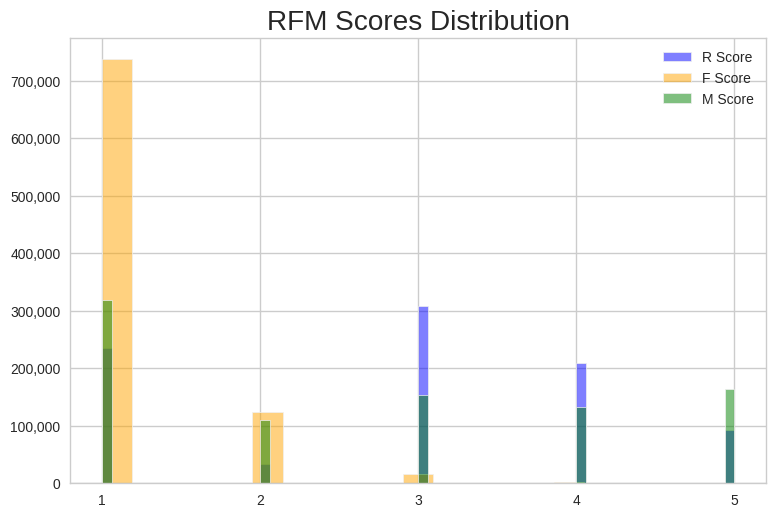

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots()

sns.histplot(data_RFM['R_Score'], ax = ax, label = 'R Score', color='blue', alpha = 0.5)
sns.histplot(data_RFM['F_Score'], ax = ax, label = 'F Score', color='orange', alpha = 0.5)
sns.histplot(data_RFM['M_Score'], ax = ax, label = 'M Score', color='green', alpha = 0.5)

ax.legend()
plt.xticks(range(1, 6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('RFM Scores Distribution')
plt.show()

Từ những số liệu thống kê trên, hầu hết các điểm số của các chỉ số Monetary, Recency và Frequency đều tập trung ở mức 1, điều này cho thấy phần lớn khách hàng là bình thường và một nhóm nhỏ khách hàng giàu có đang ảnh hưởng mạnh mẽ đến toàn bộ phân phối.

Dựa trên trung bình của mỗi điểm số chỉ số, quyết định lớp của mỗi bản ghi khách hàng.

Chúng ta sẽ sử dụng Trung bình cộng làm cơ sở quyết định và gán tất cả các bản ghi cao hơn hoặc bằng Trung bình cộng vào Lớp 1 và các bản ghi thấp hơn Trung bình cộng vào Lớp 0.

Cơ sở cũng có thể là Trung bình cộng, tùy thuộc vào phân phối điểm số và yêu cầu kinh doanh.

Trong đoạn mã này, chúng ta tính toán các giá trị trung bình của các cột ‘R_Score’, ‘F_Score’, và ‘M_Score’ sử dụng phương thức .mean(). Sau đó, chúng ta sử dụng so sánh vector hóa (>=) để so sánh từng phần tử trong các cột tương ứng với trung bình cộng tương ứng. Các giá trị boolean thu được được chuyển đổi thành số nguyên sử dụng .astype(int) và sau đó thành chuỗi sử dụng .astype(str). Cuối cùng, các cột mong muốn được chọn và lưu trữ trong DataFrame data_RFM.

Bằng cách tận dụng các thao tác vector hóa, bạn có thể thực hiện các phép tính một cách hiệu quả mà không cần đến hàm lambda hay vòng lặp rõ ràng, dẫn đến hiệu suất cải thiện.

In [ ]:
mean_R_score = data_RFM['R_Score'].mean()
mean_F_score = data_RFM['F_Score'].mean()
mean_M_score = data_RFM['M_Score'].mean()

data_RFM['R'] = (data_RFM['R_Score'] >= mean_R_score).astype(int).astype(str)
data_RFM['F'] = (data_RFM['F_Score'] >= mean_F_score).astype(int).astype(str)
data_RFM['M'] = (data_RFM['M_Score'] >= mean_M_score).astype(int).astype(str)

data_RFM = data_RFM[['CustomerID', 'R', 'F', 'M']]
data_RFM.head()

,CustomerID,R,F,M
0,C1010011,1,1,1
1,C1010012,1,0,1
2,C1010014,0,1,1
3,C1010018,1,0,0
4,C1010024,1,0,1


In [ ]:
data_RFM['RFM'] = data_RFM['R'] + data_RFM['F'] + data_RFM['M']

conditions = [
    (data_RFM['RFM'] == '111'),
    (data_RFM['RFM'] == '101'),
    (data_RFM['RFM'] == '110'),
    (data_RFM['RFM'] == '011'),
    (data_RFM['RFM'] == '001'),
    (data_RFM['RFM'] == '100'),
    (data_RFM['RFM'] == '010'),
    (data_RFM['RFM'] == '000')
]

values = [
    'Most Valuable Customer',
    'Important Developing Customer',
    'Ordinary Customer',
    'Important Maintaining Customer',
    'Important Recalling Customer',
    'Ordinary Developing Customer',
    'Ordinary Maintaining Customer',
    'Ordinary Recalling Customer'
]

data_RFM['Class'] = np.select(conditions, values, default = '')
data_RFM.sample(5)

,CustomerID,R,F,M,RFM,Class
158403,C2433716,1,0,0,100,Ordinary Developing Customer
254726,C3328868,1,1,1,111,Most Valuable Customer
254799,C3329085,1,0,0,100,Ordinary Developing Customer
757262,C7940848,1,0,0,100,Ordinary Developing Customer
765509,C8030984,1,1,1,111,Most Valuable Customer


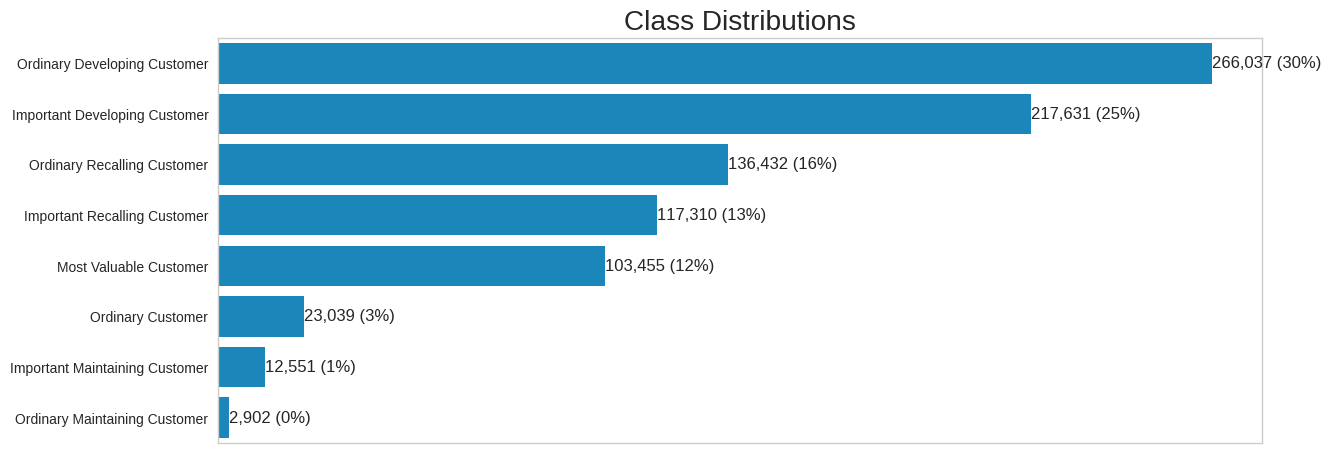

In [ ]:
# Visualize
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=data_RFM, y='Class', order=data_RFM['Class'].value_counts().index)

abs_values = data_RFM['Class'].value_counts(ascending=False)
rel_values = data_RFM['Class'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]:,} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height() / 2, lbls[i], va='center', size=12)

plt.title('Class Distributions')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(size=10)

ax.set(xticks=[])

plt.show()

# **4.Pareto Analysis**
Phân tích Pareto, còn được biết đến với tên gọi quy tắc 80/20 hay nguyên tắc Pareto, là một kỹ thuật được sử dụng trong quyết định và giải quyết vấn đề để ưu tiên và tập trung nỗ lực vào những yếu tố hoặc vấn đề quan trọng nhất có ảnh hưởng lớn nhất. Nó được đặt theo tên của nhà kinh tế người Ý Vilfredo Pareto, người đã quan sát thấy rằng khoảng 80% của cải ở Ý được sở hữu bởi 20% dân số.

Hãy kiểm tra xem những khách hàng có giá trị đã đóng góp nhiều nhất vào khối lượng giao dịch hay không.

Nhóm theo lớp RFM và tổng hợp khối lượng giao dịch của mỗi lớp.

In [ ]:
from matplotlib.ticker import PercentFormatter

pareto_df = data.groupby(['CustomerID']).agg(Transaction_Amt = ('TransactionAmount (INR)', 'sum')).reset_index()

pareto_df.head()

,CustomerID,Transaction_Amt
0,C1010011,5106.0
1,C1010012,1499.0
2,C1010014,1455.0
3,C1010018,30.0
4,C1010024,5000.0


In [ ]:
# Sắp xếp các giá trị theo thứ tự giảm dần
pareto_df = pareto_df.merge(data_RFM[['CustomerID', 'Class']], on = 'CustomerID')
pareto_df = pareto_df[['Class', 'Transaction_Amt']].groupby('Class').sum()
pareto_df = pareto_df.sort_values(by = 'Transaction_Amt', ascending = False)

In [ ]:
# Thêm cột phần trăm tích lũy
pareto_df['Trans_Percent'] = round(pareto_df["Transaction_Amt"] / pareto_df["Transaction_Amt"].sum() * 100, 2)
pareto_df["Cum_Percent"] = round(pareto_df["Transaction_Amt"].cumsum() / pareto_df["Transaction_Amt"].sum() * 100, 2)
print(pareto_df)

                                Transaction_Amt  Trans_Percent  Cum_Percent
Class                                                                      
Important Developing Customer      7.007672e+08          42.96        42.96
Most Valuable Customer             4.183284e+08          25.64        68.60
Important Recalling Customer       3.734390e+08          22.89        91.50
Ordinary Developing Customer       5.378822e+07           3.30        94.79
Important Maintaining Customer     4.914733e+07           3.01        97.81
Ordinary Recalling Customer        2.821022e+07           1.73        99.54
Ordinary Customer                  6.705884e+06           0.41        99.95
Ordinary Maintaining Customer      8.488218e+05           0.05       100.00


Tạo Biểu Đồ Pareto: Biểu đồ Pareto dưới đây mô tả cách thức khối lượng giao dịch được tích lũy qua các lớp RFM.

Từ biểu đồ, chúng ta có thể kết luận rằng các lớp Khách Hàng Phát Triển Quan Trọng, Khách Hàng Có Giá Trị Nhất, và Khách Hàng Gọi Nhớ Quan Trọng đã đóng góp hơn 90% tổng khối lượng giao dịch. Những khách hàng này chiếm 50% tổng số khách hàng của ngân hàng. Mặc dù con số không phải là 20%, nhưng nó vẫn cho thấy tầm quan trọng của việc phân khúc khách hàng và dịch vụ hướng đích. Nếu chúng ta coi khối lượng là KPI cốt lõi, chúng ta nên tập trung phần lớn nguồn lực của mình để cung cấp sản phẩm và dịch vụ tốt hơn cho những lớp khách hàng này

<ipython-input-59-b7c770135620>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_labels, size = 12)


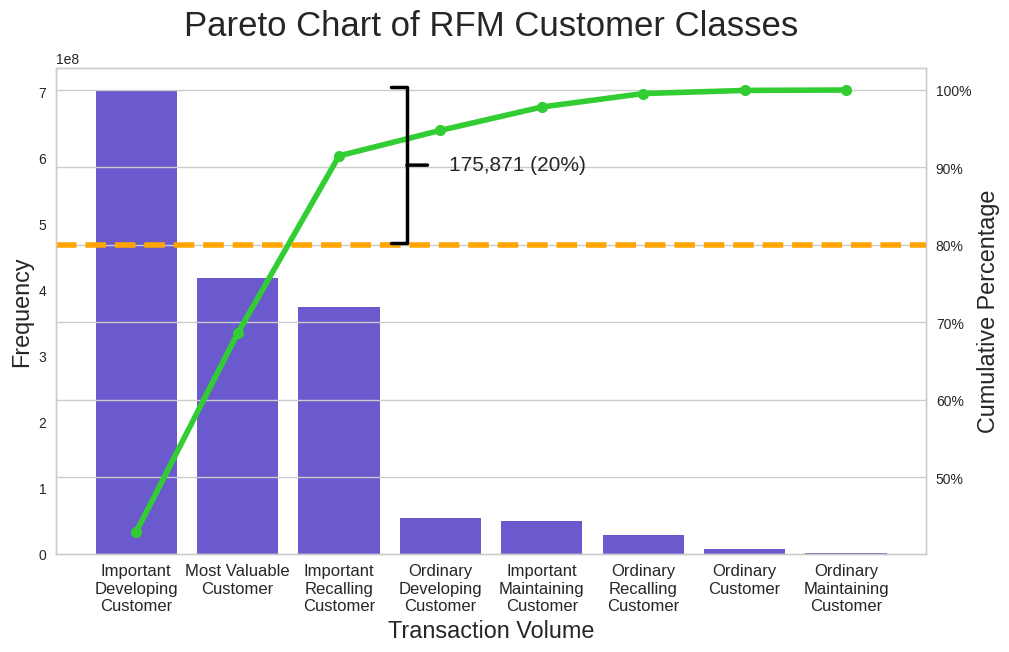

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))


ax.bar(pareto_df.index, pareto_df["Transaction_Amt"], color = 'slateblue')
ax.set_title("Pareto Chart of RFM Customer Classes", size = 25, y = 1.05)
ax.set_xlabel("Transaction Volume")
ax.set_ylabel("Frequency")
ax.grid(None)


ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df["Cum_Percent"], color = "limegreen", marker = "o", ms = 8)
ax2.axhline(80, color = "orange", linestyle = "dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")


import textwrap
wrapped_labels = [textwrap.fill(label, 15) for label in pareto_df.index]
ax.set_xticklabels(wrapped_labels, size = 12)


annotation_text = "{:,} (20%)".format(int(0.2 * data_RFM.shape[0]))
ax2.annotate("", xy = (0.4, 0.8), xytext = (0.43, 0.8),
            xycoords = 'axes fraction', textcoords = 'axes fraction',
            arrowprops=dict(arrowstyle="-[,widthB = 4.0, lengthB = 0.8", lw = 2.5, color = 'black'),
            annotation_clip=False)


ax2.annotate(annotation_text, xy = (0.53, 0.79),
            xycoords = 'axes fraction', fontsize = 15, ha = 'center')

plt.show()


In [ ]:
data_RFM.describe()

,CustomerID,R,F,M,RFM,Class
count,879357,879357,879357,879357,879357,879357
unique,879357,2,2,2,8,8
top,C1010011,1,0,1,100,Ordinary Developing Customer
freq,1,610162,737410,450947,266037,266037


#**5.MÔ HÌNH**

##**KMEANS**


In [ ]:
kmeans = KMeans(n_clusters=4 , **kmeans_set)
kmeans.fit(df_scaled)
df_scaled['Label']=kmeans.labels_
df_scaled

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,Label
0,-0.410992,0.607588,-0.142340,-0.216341,0.265483,1
1,-0.410992,0.607588,0.610186,-0.093540,0.899616,3
2,1.816407,0.607588,0.575669,-0.016524,0.793927,0
3,-0.410992,0.607588,-0.076593,-0.110328,-0.368651,1
4,-0.410992,0.607588,-0.093878,-0.165977,-0.580029,1
...,...,...,...,...,...,...
99995,-0.410992,0.607588,-0.124615,-0.226445,-0.580029,1
99996,-0.410992,0.607588,0.038414,-0.060741,-0.157273,1
99997,1.816407,0.607588,-0.101405,-0.193180,0.054105,0
99998,-0.410992,0.607588,-0.141270,-0.234217,-1.848297,1


In [ ]:
WCSS = []
silh_scores_kmeans = []
db_scores_kmeans = []

for n_cluster in range(2, 11):
    model_kmeans = KMeans(n_clusters=n_cluster)
    model_kmeans.fit(df_scaled)
    WCSS.append(model_kmeans.inertia_)
    silh_scores_kmeans.append(silhouette_score(df_scaled, model_kmeans.labels_))
    db_scores_kmeans.append(davies_bouldin_score(df_scaled, model_kmeans.labels_))

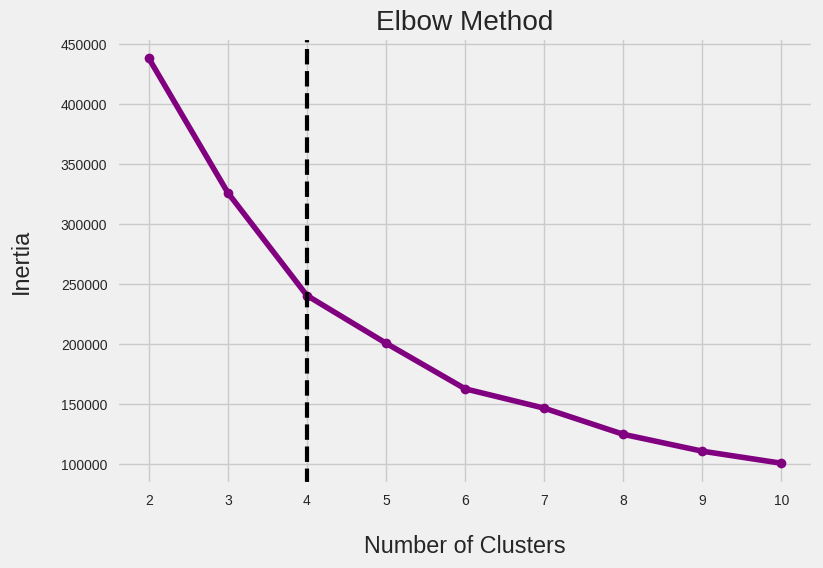

In [ ]:
plt.style.use("fivethirtyeight")
# fig,ax=plt.subplots(1,2,figsize=(20,5))
kl = KneeLocator(range(2,11), WCSS, curve='convex', direction="decreasing")
plt.plot(range(2,11), WCSS,color='purple',marker='o',label='Elbow Method')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters", labelpad=20)
plt.ylabel("Inertia", labelpad=20)
plt.title("Elbow Method")
plt.axvline(x=kl.elbow, color='black', label='axvline-fullheight', ls='--', linewidth=3)

**Phương pháp Elbow:**

Biểu đồ cho thấy một sự giảm mạnh về giá trị Inertia và bắt đầu ổn định xung quanh số lượng cụm là 4.

Điều này chỉ ra rằng số lượng cụm tối ưu để phân loại dữ liệu là 4.

**Giá trị Silhouette:**

Biểu đồ cho thấy điểm cao nhất ở số lượng cụm là 4, phù hợp với kết luận từ phương pháp Elbow.

Điểm silhouette cao tại đây cho thấy sự phân chia cụm là tốt và có tính phân biệt cao.

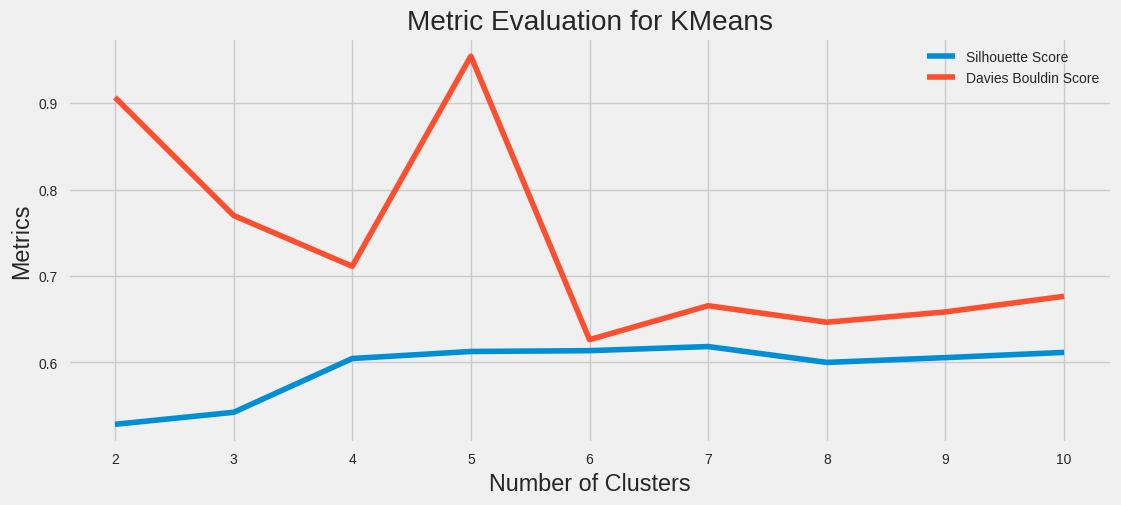

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(range(2, 11), silh_scores_kmeans, label="Silhouette Score")
plt.plot(range(2, 11), db_scores_kmeans, label="Davies Bouldin Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Metrics")
plt.title("Metric Evaluation for KMeans")
plt.legend()
plt.show()

##***TRỰC QUAN HÓA***

In [ ]:
kmeans = KMeans(n_clusters=4 , **kmeans_set)
Y = kmeans.fit_predict(df_scaled)
df_scaled['Label']=Y

In [ ]:
import plotly.graph_objects as go

attributes = df_scaled.columns[:5]
colors = ['purple', 'yellow', 'blue', 'magenta']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

fig = go.Figure()

for index in range(0, 4):
    r_values = np.mean(df_scaled.loc[df_scaled['Label'] == index, attributes], axis=0)
    fig.add_trace(go.Scatterpolar(
        r=r_values,
        theta=attributes,
        fill='toself',
        fillcolor=colors[index],
        opacity=0.4,
        name=cluster[index]
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title="Radar plot - Cluster attributes"
)

fig.show()